In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

In [3]:
import cv2
import PIL

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image_dir=Path(r'/content/drive/MyDrive/BTP_dataset - Copy 1')

In [7]:
sub_labels_dict={
"sub1"  :32  ,
"sub2"  :23  ,
"sub3"  :22  ,
"sub4"  :21  ,
"sub5"  :22  ,
"sub6"  :23  ,
"sub7"  :21  ,
"sub8"  :20  ,
"sub9"  :21  ,
"sub10" :23  ,
"sub11" :21  ,
"sub12" :22  ,
"sub13"  :21  ,
"sub14" :20  ,
"sub15" :25  ,
"sub16" :20  ,
"sub17"  :21  ,
"sub18" :22  ,
"sub19" :23  ,
"sub20" :20  ,
"sub21" :21  ,
"sub22" :21  ,
"sub23"  :23  ,
"sub24" :21  ,
"sub25" :21  ,
"sub26" :23  ,
"sub27" :21  ,
"sub28" :23  ,
"sub29" :22  ,
"sub30"  :21  ,
"sub31" :21  ,
"sub32"  :22  ,
"sub33" :21  ,
"sub34"  :27  ,
"sub35"  :21  ,
"sub36"  :22  ,
"sub37"  :20  ,
"sub38"  :21  ,
"sub39"  :33  ,
"sub40" :22  ,
"sub41"  :23  ,
"sub42"  :21  ,
"sub43"  :21  ,
"sub44"  :22  ,
"sub45"  :40  ,
"sub46"  :23  ,
"sub47"  :22  ,
"sub48"  :25  ,
"sub49"  :29  ,
"sub50"  :34  ,
"sub51" :37  ,
"sub52" :74  ,
"sub53" :21  ,
"sub54"  :21  ,
"sub55" :42  ,
"sub56" :20  ,
"sub57" :22  ,
"sub58" :41  ,
"sub59" :21  ,
"sub60":29  ,
"sub61"  :26  ,
"sub62" :39  ,
"sub63" :21  ,
"sub64" :21  ,
"sub65"  :23  ,
"sub66"  :22  ,
"sub67"  :21  ,
"sub68"  :23  ,
"sub69" :22  ,
"sub70"  :24  ,
"sub71"  :47  ,
"sub72"  :21  ,
"sub73" :22  ,
"sub74"  :22  ,
"sub75" :23  ,
"sub76" :25  ,
"sub77"  :23  ,
"sub78"    :23  ,
"sub79"  :25  ,
"sub80" :23  ,
"sub81" :25  ,
"sub82"  :22  ,
"sub83" :25  ,
"sub84"  :23  ,
"sub85"  :23  ,
"sub86"  :22  ,
"sub87"  :23  ,
"sub88"  :22  ,
"sub89"  :22  ,
"sub90"  :22  ,
"sub91"  :23  ,
"sub92" :31  ,
"sub93"  :23  ,
"sub94"  :25  ,
"sub95" :23  ,
"sub96"  :25  ,
"sub97"  :22  ,
"sub98"  :25  ,
"sub99" :27  ,
"sub100"  :21  ,
"sub101" :23  ,
"sub102"  :55  ,
"sub103"  :22  ,
"sub104" :22  ,
"sub105"  :24  ,
"sub106"  :22  ,
"sub107"  :22  ,
"sub108"  :22  ,
"sub109" :23  ,
"sub110"  :22  ,
"sub111"  :22  ,
"sub112"  :57  ,
"sub113" :41  ,
"sub114" :46  ,
"sub115" :74  ,
"sub116"  :27  ,
"sub117"  :22  ,
"sub118" :23  ,
"sub119"  :22  ,
"sub120"  :20  ,
"sub121"  :23  ,
"sub122" :43  ,
"sub123" :23  ,
"sub124" :23  ,
"sub125" :23  ,
"sub126"  :23  ,
"sub127"  :26  ,
"sub128"  :23  ,
"sub129"  :23  ,
"sub130"  :23  ,


}

In [8]:
sub_images_dict={
"sub1":list(image_dir.glob('sub1/32/*')),
"sub2":list(image_dir.glob('sub2/23/*')),
"sub3":list(image_dir.glob('sub3/22/*')),
"sub4":list(image_dir.glob('sub4/21/*')),
"sub5":list(image_dir.glob('sub5/22/*')),
"sub6":list(image_dir.glob('sub6/23/*')),
"sub7":list(image_dir.glob('sub7/21/*')),
"sub8":list(image_dir.glob('sub8/20/*')),
"sub9":list(image_dir.glob('sub9/21/*')),
"sub10":list(image_dir.glob('sub10/23/*')),
"sub11":list(image_dir.glob('sub11/21/*')),
"sub12":list(image_dir.glob('sub12/22/*')),
"sub13":list(image_dir.glob('sub13/21/*')),
"sub14":list(image_dir.glob('sub14/20/*')),
"sub15":list(image_dir.glob('sub15/25/*')),
"sub16":list(image_dir.glob('sub16/20/*')),
"sub17":list(image_dir.glob('sub17/21/*')),
"sub18":list(image_dir.glob('sub18/22/*')),
"sub19":list(image_dir.glob('sub19/23/*')),
"sub20":list(image_dir.glob('sub20/20/*')),
"sub21":list(image_dir.glob('sub21/21/*')),
"sub22":list(image_dir.glob('sub22/21/*')),
"sub23":list(image_dir.glob('sub23/23/*')),
"sub24":list(image_dir.glob('sub24/21/*')),
"sub25":list(image_dir.glob('sub25/21/*')),
"sub26":list(image_dir.glob('sub26/23/*')),
"sub27":list(image_dir.glob('sub27/21/*')),
"sub28":list(image_dir.glob('sub28/23/*')),
"sub29":list(image_dir.glob('sub29/22/*')),
"sub30":list(image_dir.glob('sub30/21/*')),
"sub31":list(image_dir.glob('sub31/21/*')),
"sub32":list(image_dir.glob('sub32/22/*')),
"sub33":list(image_dir.glob('sub33/21/*')),
"sub34":list(image_dir.glob('sub34/27/*')),
"sub35":list(image_dir.glob('sub35/21/*')),
"sub36":list(image_dir.glob('sub36/22/*')),
"sub37":list(image_dir.glob('sub37/20/*')),
"sub38":list(image_dir.glob('sub38/21/*')),
"sub39":list(image_dir.glob('sub39/33/*')),
"sub40":list(image_dir.glob('sub40/22/*')),
"sub41":list(image_dir.glob('sub41/23/*')),
"sub42":list(image_dir.glob('sub42/21/*')),
"sub43":list(image_dir.glob('sub43/21/*')),
"sub44":list(image_dir.glob('sub44/22/*')),
"sub45":list(image_dir.glob('sub45/40/*')),
"sub46":list(image_dir.glob('sub46/23/*')),
"sub47":list(image_dir.glob('sub47/22/*')),
"sub48":list(image_dir.glob('sub48/25/*')),
"sub49":list(image_dir.glob('sub49/29/*')),
"sub50":list(image_dir.glob('sub50/34/*')),
"sub51":list(image_dir.glob('sub51/37/*')),
"sub52":list(image_dir.glob('sub52/74/*')),
"sub53":list(image_dir.glob('sub53/21/*')),
"sub54":list(image_dir.glob('sub54/21/*')),
"sub55":list(image_dir.glob('sub55/42/*')),
"sub56":list(image_dir.glob('sub56/20/*')),
"sub57":list(image_dir.glob('sub57/22/*')),
"sub58":list(image_dir.glob('sub58/41/*')),
"sub59":list(image_dir.glob('sub59/21/*')),
"sub60":list(image_dir.glob('sub60/29/*')),
"sub61":list(image_dir.glob('sub61/26/*')),
"sub62":list(image_dir.glob('sub62/39/*')),
"sub63":list(image_dir.glob('sub63/21/*')),
"sub64":list(image_dir.glob('sub64/21/*')),
"sub65":list(image_dir.glob('sub65/23/*')),
"sub66":list(image_dir.glob('sub66/22/*')),
"sub67":list(image_dir.glob('sub67/21/*')),
"sub68":list(image_dir.glob('sub68/23/*')),
"sub69":list(image_dir.glob('sub69/22/*')),
"sub70":list(image_dir.glob('sub70/24/*')),
"sub71":list(image_dir.glob('sub71/47/*')),
"sub72":list(image_dir.glob('sub72/21/*')),
"sub73":list(image_dir.glob('sub73/22/*')),
"sub74":list(image_dir.glob('sub74/22/*')),
"sub75":list(image_dir.glob('sub75/23/*')),
"sub76":list(image_dir.glob('sub76/25/*')),
"sub77":list(image_dir.glob('sub77/23/*')),
"sub78":list(image_dir.glob('sub78/23/*')),
"sub79":list(image_dir.glob('sub79/25/*')),
"sub80":list(image_dir.glob('sub80/23/*')),
"sub81":list(image_dir.glob('sub81/25/*')),
"sub82":list(image_dir.glob('sub82/22/*')),
"sub83":list(image_dir.glob('sub83/25/*')),
"sub84":list(image_dir.glob('sub84/23/*')),
"sub85":list(image_dir.glob('sub85/23/*')),
"sub86":list(image_dir.glob('sub86/22/*')),
"sub87":list(image_dir.glob('sub87/23/*')),
"sub88":list(image_dir.glob('sub88/22/*')),
"sub89":list(image_dir.glob('sub89/22/*')),
"sub90":list(image_dir.glob('sub90/22/*')),
"sub91":list(image_dir.glob('sub91/23/*')),
"sub92":list(image_dir.glob('sub92/31/*')),
"sub93":list(image_dir.glob('sub93/23/*')),
"sub94":list(image_dir.glob('sub94/25/*')),
"sub95":list(image_dir.glob('sub95/23/*')),
"sub96":list(image_dir.glob('sub96/25/*')),
"sub97":list(image_dir.glob('sub97/22/*')),
"sub98":list(image_dir.glob('sub98/25/*')),
"sub99":list(image_dir.glob('sub99/27/*')),
"sub100":list(image_dir.glob('sub100/21/*')),
"sub101":list(image_dir.glob('sub101/23/*')),
"sub102":list(image_dir.glob('sub102/55/*')),
"sub103":list(image_dir.glob('sub103/22/*')),
"sub104":list(image_dir.glob('sub104/22/*')),
"sub105":list(image_dir.glob('sub105/24/*')),
"sub106":list(image_dir.glob('sub106/22/*')),
"sub107":list(image_dir.glob('sub107/22/*')),
"sub108":list(image_dir.glob('sub108/22/*')),
"sub109":list(image_dir.glob('sub109/23/*')),
"sub110":list(image_dir.glob('sub110/22/*')),
"sub111":list(image_dir.glob('sub111/22/*')),
"sub112":list(image_dir.glob('sub112/57/*')),
"sub113":list(image_dir.glob('sub113/41/*')),
"sub114":list(image_dir.glob('sub114/46/*')),
"sub115":list(image_dir.glob('sub115/74/*')),
"sub116":list(image_dir.glob('sub116/27/*')),
"sub117":list(image_dir.glob('sub117/22/*')),
"sub118":list(image_dir.glob('sub118/23/*')),
"sub119":list(image_dir.glob('sub119/22/*')),
"sub120":list(image_dir.glob('sub120/20/*')),
"sub121":list(image_dir.glob('sub121/23/*')),
"sub122":list(image_dir.glob('sub122/43/*')),
"sub123":list(image_dir.glob('sub123/23/*')),
"sub124":list(image_dir.glob('sub124/23/*')),
"sub125":list(image_dir.glob('sub125/23/*')),
"sub126":list(image_dir.glob('sub126/23/*')),
"sub127":list(image_dir.glob('sub127/26/*')),
"sub128":list(image_dir.glob('sub128/23/*')),
"sub129":list(image_dir.glob('sub129/23/*')),
"sub130":list(image_dir.glob('sub130/23/*')),

}

In [9]:
X,Y=[],[]
for sub_name,images in sub_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        Y.append(sub_labels_dict[sub_name])

In [10]:
X=np.array(X)
Y=np.array(Y)

In [11]:
len(X)

694

In [12]:
X[:]

array([[[[115, 115, 115],
         [115, 115, 115],
         [115, 115, 115],
         ...,
         [228, 228, 228],
         [228, 228, 228],
         [228, 228, 228]],

        [[115, 115, 115],
         [115, 115, 115],
         [115, 115, 115],
         ...,
         [228, 228, 228],
         [228, 228, 228],
         [228, 228, 228]],

        [[115, 115, 115],
         [115, 115, 115],
         [115, 115, 115],
         ...,
         [228, 228, 228],
         [228, 228, 228],
         [228, 228, 228]],

        ...,

        [[207, 207, 207],
         [207, 207, 207],
         [207, 207, 207],
         ...,
         [223, 223, 223],
         [223, 223, 223],
         [224, 224, 224]],

        [[211, 211, 211],
         [211, 211, 211],
         [211, 211, 211],
         ...,
         [224, 224, 224],
         [224, 224, 224],
         [224, 224, 224]],

        [[211, 211, 211],
         [211, 211, 211],
         [211, 211, 211],
         ...,
         [224, 224, 224],
        

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,train_size=0.8,shuffle=True)

In [14]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [15]:
data_augmentation=keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomFlip('horizontal',input_shape=(224,224,3)),
    layers.RandomRotation(0.2)
])

In [16]:
vgg16_model=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
model = keras.Sequential()
model.add(data_augmentation)
i = 0;
for layer in vgg16_model.layers:
    layer.trainable=False
    model.add(layer)

    

In [18]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(1, activation='linear'))

In [19]:
model.compile(
    optimizer='adam',
    loss='mse',metrics=['mae']
)
history = model.fit(
    X_train_scaled,Y_train,
    validation_split=0.125,
    epochs=50,
)


Epoch 1/50
16/16 [==============================] - 18s 296ms/step - loss: 247.1987 - mae: 10.5755 - val_loss: 104.9984 - val_mae: 8.8800
Epoch 2/50
16/16 [==============================] - 3s 165ms/step - loss: 97.8279 - mae: 6.6282 - val_loss: 64.8578 - val_mae: 5.0566
Epoch 3/50
16/16 [==============================] - 3s 164ms/step - loss: 87.6657 - mae: 5.6608 - val_loss: 77.4495 - val_mae: 4.0782
Epoch 4/50
16/16 [==============================] - 3s 164ms/step - loss: 78.7120 - mae: 5.2561 - val_loss: 71.7556 - val_mae: 3.8997
Epoch 5/50
16/16 [==============================] - 3s 164ms/step - loss: 77.4838 - mae: 5.0106 - val_loss: 64.7172 - val_mae: 5.1277
Epoch 6/50
16/16 [==============================] - 3s 165ms/step - loss: 76.3444 - mae: 5.6564 - val_loss: 65.9623 - val_mae: 4.0313
Epoch 7/50
16/16 [==============================] - 3s 164ms/step - loss: 74.7914 - mae: 5.1011 - val_loss: 70.6241 - val_mae: 6.2565
Epoch 8/50
16/16 [==============================] - 3s 166

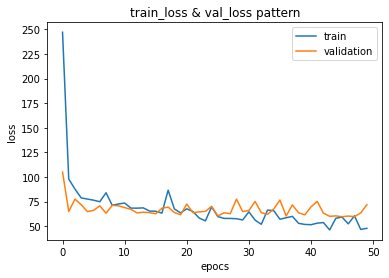

In [20]:
fig1=plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.title('train_loss & val_loss pattern')
plt.xlabel('epocs')
plt.ylabel('loss')
plt.show()

In [21]:
model.evaluate(X_test_scaled,Y_test)

5/5 [==============================] - 2s 431ms/step - loss: 27.0184 - mae: 2.8793


[27.018362045288086, 2.879322052001953]

In [22]:
fig2=plt.gcf()
fig2

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>